In [1]:
import numpy as np

In [2]:
with open('2D_example_dame.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-326.9730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-293.1415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,NaN
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,NaN,-1.831199
0,1.116025,3.353602



In [3]:
data = np.loadtxt("2D_example_dame.csv", delimiter=',')

In [4]:
y = data[:, 0].astype(int)

In [5]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [6]:
X = data[:, 1:3].astype(float)

In [7]:
X

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,              nan],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [             nan,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

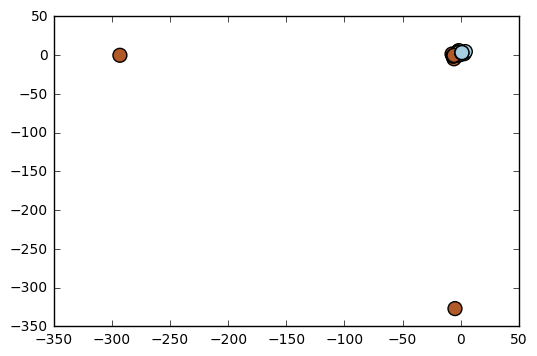

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)

In [14]:
plt.set_cmap(plt.cm.Paired)

(-10, 10)

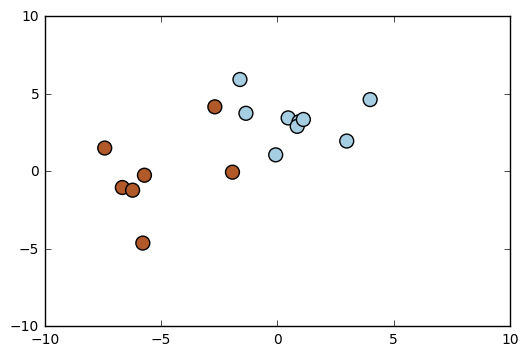

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlim(-10,10)
plt.ylim(-10, 10)

In [19]:
s = 1

In [20]:
~s

-2

In [22]:
~np.isnan(X[:, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True], dtype=bool)

In [35]:
X1 = X[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]
y1 = y[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]

In [36]:
X2 = X1[(abs(X1[:, 0]) <10) & (abs(X1[:, 1]) < 10)]
y2 = y1[(abs(X1[:, 0]) <10) & (abs(X1[:, 1]) < 10)]

In [38]:
y2.shape

(16,)

In [39]:
from sklearn.preprocessing import Imputer

In [40]:
missing_value_to_mean = Imputer()

In [41]:
missing_value_to_mean.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [42]:
missing_value_to_mean

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [43]:
X_new = missing_value_to_mean.transform(X)

In [45]:
X_new

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,  -1.57953962e+01],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [ -1.70755753e+01,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

In [46]:
missing_value_to_median = Imputer(strategy='median')
missing_value_to_median.fit(X)
X_new2 = missing_value_to_median.transform(X)
X_new2

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,   1.50990300e+00],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [ -1.61177100e+00,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

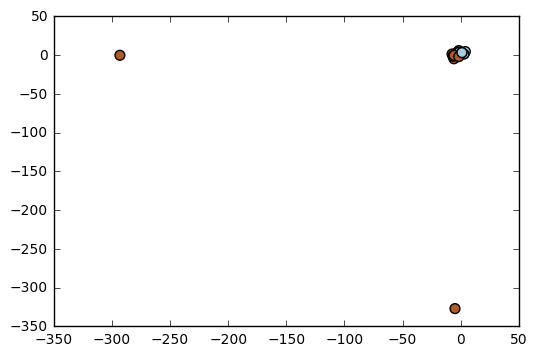

In [47]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y, s=50)

In [57]:
from  urllib2 import urlopen

In [84]:
res = urlopen('http://www.gutenberg.org/files/11/11-0.txt', 'alice.txt')

In [85]:
file = res.read()

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
txt_vec = CountVectorizer(input = 'content')

In [88]:
txt_vec.fit([file])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [90]:
txt_vec.get_feature_names()[100:120]

[u'along',
 u'aloud',
 u'already',
 u'also',
 u'alteration',
 u'altered',
 u'alternate',
 u'alternately',
 u'altogether',
 u'always',
 u'am',
 u'ambition',
 u'among',
 u'an',
 u'ancient',
 u'and',
 u'anger',
 u'angrily',
 u'angry',
 u'animal']

In [91]:
alice_vec = txt_vec.transform([file])

In [92]:
alice_vec

<1x3019 sparse matrix of type '<type 'numpy.int64'>'
	with 3019 stored elements in Compressed Sparse Row format>

In [93]:
alice_vec = alice_vec.toarray()

In [94]:
alice_vec[0, 100:120]

array([  6,   5,   3,   4,   1,   1,   1,   1,   5,  13,  16,   1,  12,
        61,   1, 940,   2,   9,   5,   2])

In [98]:
for word, number in zip(txt_vec.get_feature_names()[100:120], alice_vec[0,100:120]):
    print(word, number)

(u'along', 6)
(u'aloud', 5)
(u'already', 3)
(u'also', 4)
(u'alteration', 1)
(u'altered', 1)
(u'alternate', 1)
(u'alternately', 1)
(u'altogether', 5)
(u'always', 13)
(u'am', 16)
(u'ambition', 1)
(u'among', 12)
(u'an', 61)
(u'ancient', 1)
(u'and', 940)
(u'anger', 2)
(u'angrily', 9)
(u'angry', 5)
(u'animal', 2)


In [99]:
from sklearn.datasets import load_sample_image

In [100]:
china = load_sample_image('china.jpg')

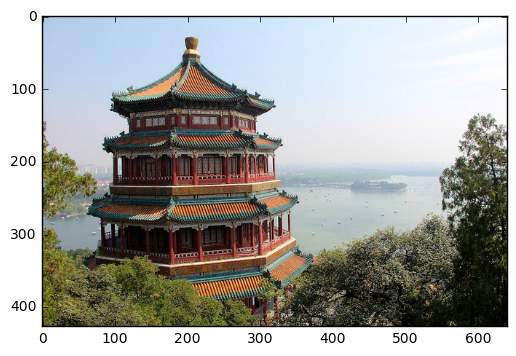

In [101]:
plt.imshow(china)

In [102]:
 china.shape

(427, 640, 3)

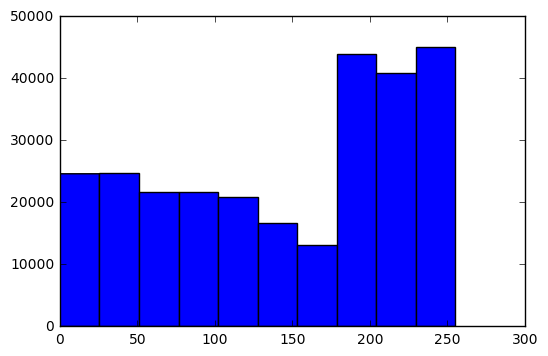

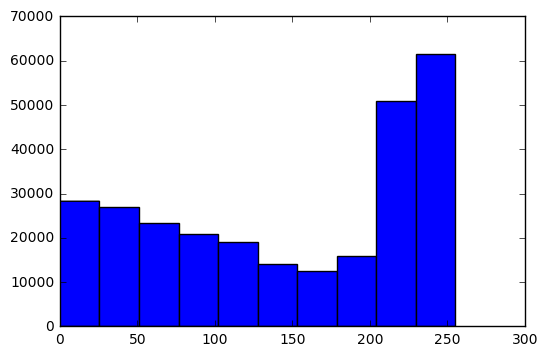

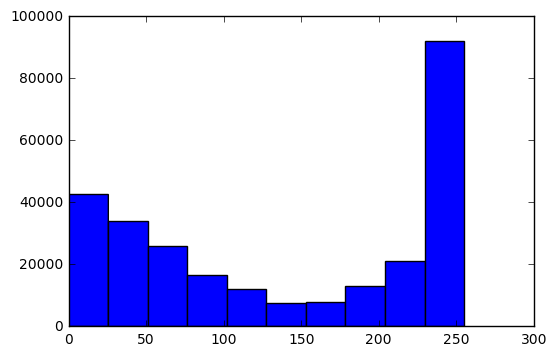

In [105]:
histR = plt.hist(china[:, :, 0].ravel(), bins=10)
plt.show()
histG = plt.hist(china[:, :, 1].ravel(), bins=10)
plt.show()
histB = plt.hist(china[:, :, 2].ravel(), bins=10)
plt.show()

In [106]:
histRGBcat = np.hstack((histR[0], histG[0], histB[0]))

<Container object of 30 artists>

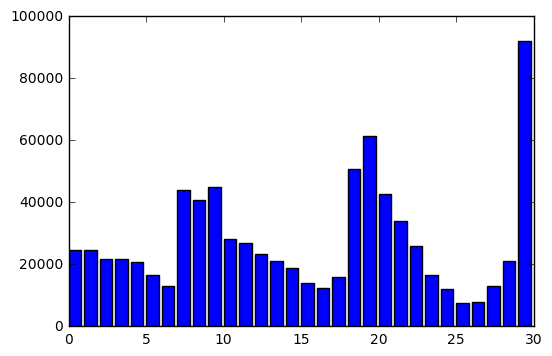

In [107]:
plt.bar(range(len(histRGBcat)), histRGBcat)

In [108]:
histRGBcat_l1 = histRGBcat/(china.shape[0] * china.shape[1])

<Container object of 30 artists>

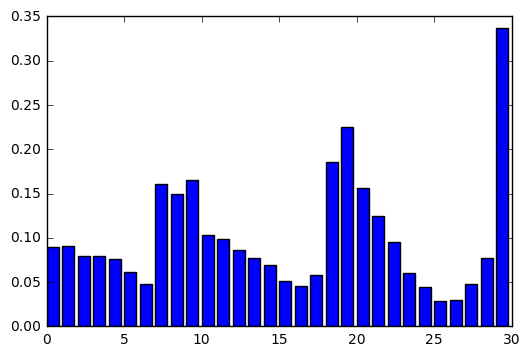

In [110]:
plt.bar(range(len(histRGBcat_l1)), histRGBcat_l1)

In [111]:
import numpy as np

In [112]:
from sklearn.datasets import load_breast_cancer

In [113]:
data = load_breast_cancer()

In [114]:
X = data.data

In [115]:
y = data.target